# Heart Disease Prediction

In [3]:
# Data manipulation and analysis
import pandas as pd

# Scientific computing
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
file_path = 'C:/Users/MSI MODERN/Desktop/fdm project/dataset.csv'  # Replace 'path_to_your_dataset' with the actual path
heart_data = pd.read_csv(file_path)

In [5]:
heart_data.shape

(4238, 16)

In [6]:
filtered_data = heart_data[heart_data['TenYearCHD'] == 1]

# Count the number of occurrences where TenYearCHD is equal to 1
count = len(filtered_data)

# 'filtered_data' now contains rows where TenYearCHD is equal to 1
print("Filtered Data:")
print(filtered_data)

# Print the count
print("Number of occurrences where TenYearCHD is equal to 1:", count)

Filtered Data:
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3        0   61        3.0              1        30.0     0.0   
6        0   63        1.0              0         0.0     0.0   
15       0   38        2.0              1        20.0     0.0   
17       0   46        2.0              1        20.0     0.0   
25       1   47        4.0              1        20.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4221     1   50        1.0              0         0.0     0.0   
4223     1   56        4.0              0         0.0     1.0   
4226     1   58        1.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3                   0             1         0    225.0  150.0   95.0  28.58   
6                   0             0         0 

In [7]:
heart_data.head(17)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [8]:
heart_data.drop('education', axis = 1, inplace = True)

In [9]:
null_values = heart_data.isnull().sum()

In [10]:
null_values

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
heart_data = heart_data.rename(columns={"BPMeds": "blood pressure medication", "totChol": "cholesterol level" })

In [13]:
data_types = heart_data.dtypes

In [14]:
data_types

male                           int64
age                            int64
currentSmoker                  int64
cigsPerDay                   float64
blood pressure medication    float64
prevalentStroke                int64
prevalentHyp                   int64
diabetes                       int64
cholesterol level            float64
sysBP                        float64
diaBP                        float64
BMI                          float64
heartRate                    float64
glucose                      float64
TenYearCHD                     int64
dtype: object

In [15]:
null_values = heart_data.isnull().sum()

In [16]:
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                    29
blood pressure medication     53
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level             50
sysBP                          0
diaBP                          0
BMI                           19
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

## Cleaning

In [17]:
#remove non values

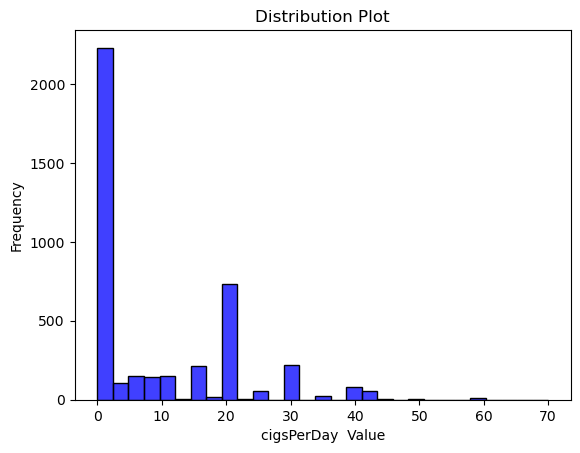

In [18]:
import seaborn as sns

# Sample data
data = heart_data.cigsPerDay 

# Create a distribution plot
sns.histplot(data, color='blue')

# Add labels and title
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [19]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].median() , inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                     0
blood pressure medication     53
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level             50
sysBP                          0
diaBP                          0
BMI                           19
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

In [20]:
count_bpm_zero = (heart_data['blood pressure medication'] == 1).sum()

In [21]:
count_bpm_zero

124

In [22]:
heart_data['blood pressure medication'].fillna(heart_data['blood pressure medication'].median() , inplace=True)

In [23]:
count_bpm_zero = (heart_data['blood pressure medication'] == 0).sum()

In [24]:
count_bpm_zero

4114

In [25]:
null_values = heart_data.isnull().sum()
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                     0
blood pressure medication      0
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level             50
sysBP                          0
diaBP                          0
BMI                           19
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

In [26]:
heart_data["cholesterol level"].fillna(heart_data['cholesterol level'].mean(),inplace=True)

In [27]:
null_values = heart_data.isnull().sum()
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                     0
blood pressure medication      0
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level              0
sysBP                          0
diaBP                          0
BMI                           19
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

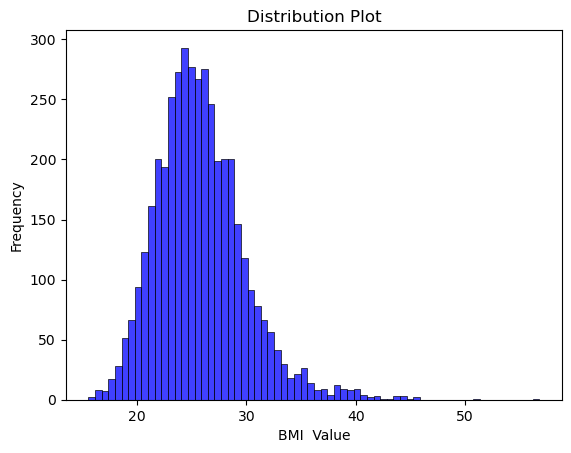

In [28]:
bmi = heart_data.BMI                  

# Create a distribution plot
sns.histplot(bmi, color='blue')

# Add labels and title
plt.xlabel('BMI  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [29]:
heart_data["BMI"].fillna(heart_data['BMI'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                     0
blood pressure medication      0
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level              0
sysBP                          0
diaBP                          0
BMI                            0
heartRate                      1
glucose                      388
TenYearCHD                     0
dtype: int64

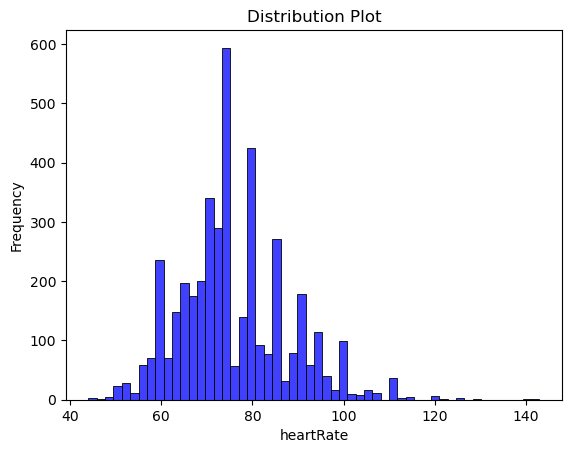

In [30]:
heartRate = heart_data.heartRate                              

# Create a distribution plot
sns.histplot(heartRate, color='blue')

# Add labels and title
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [31]:
heart_data["heartRate"].fillna(heart_data['heartRate'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                           0
age                            0
currentSmoker                  0
cigsPerDay                     0
blood pressure medication      0
prevalentStroke                0
prevalentHyp                   0
diabetes                       0
cholesterol level              0
sysBP                          0
diaBP                          0
BMI                            0
heartRate                      0
glucose                      388
TenYearCHD                     0
dtype: int64

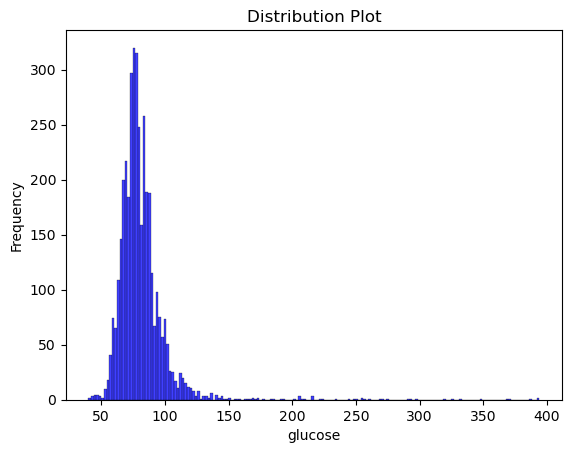

In [32]:
glucose= heart_data.glucose                                          

# Create a distribution plot
sns.histplot(glucose, color='blue')

# Add labels and title
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [33]:
heart_data["glucose"].fillna(heart_data['glucose'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
blood pressure medication    0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol level            0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                      0
TenYearCHD                   0
dtype: int64

In [34]:
heart_data.head(16)
heart_data.dtypes

male                           int64
age                            int64
currentSmoker                  int64
cigsPerDay                   float64
blood pressure medication    float64
prevalentStroke                int64
prevalentHyp                   int64
diabetes                       int64
cholesterol level            float64
sysBP                        float64
diaBP                        float64
BMI                          float64
heartRate                    float64
glucose                      float64
TenYearCHD                     int64
dtype: object

In [35]:
heart_data

,male,age,currentSmoker,cigsPerDay,blood pressure medication,prevalentStroke,prevalentHyp,diabetes,cholesterol level,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


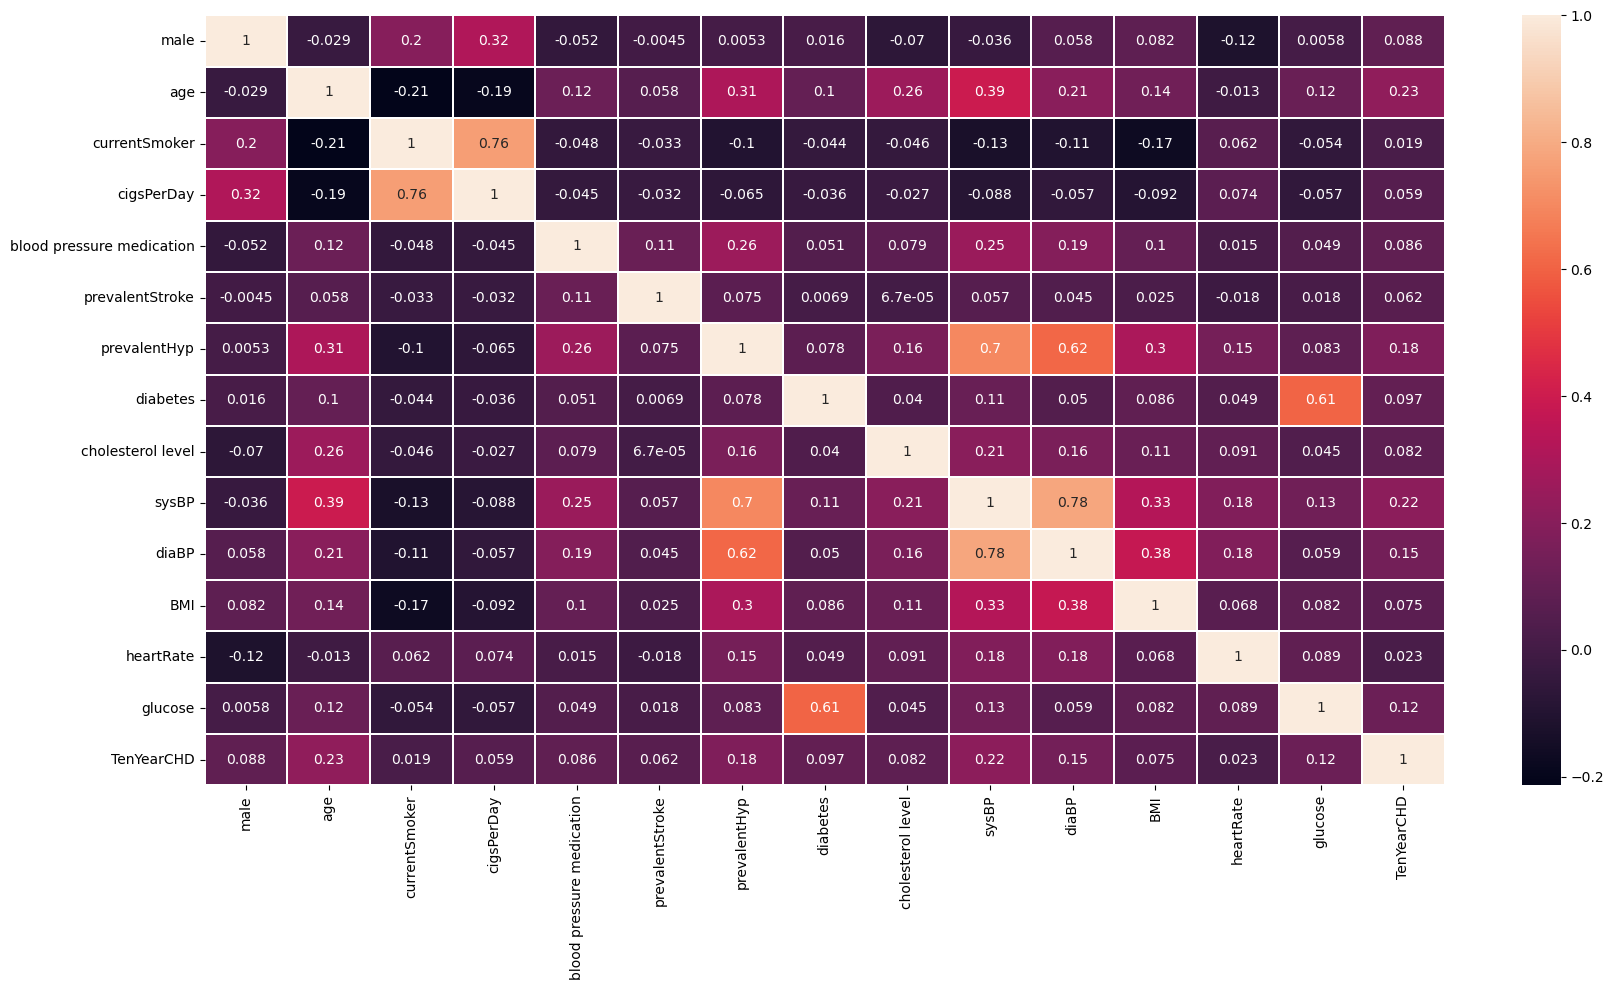

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

C:\Users\MSI MODERN\AppData\Local\Temp\ipykernel_18744\36296098.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  heart_data.hist(ax = ax)


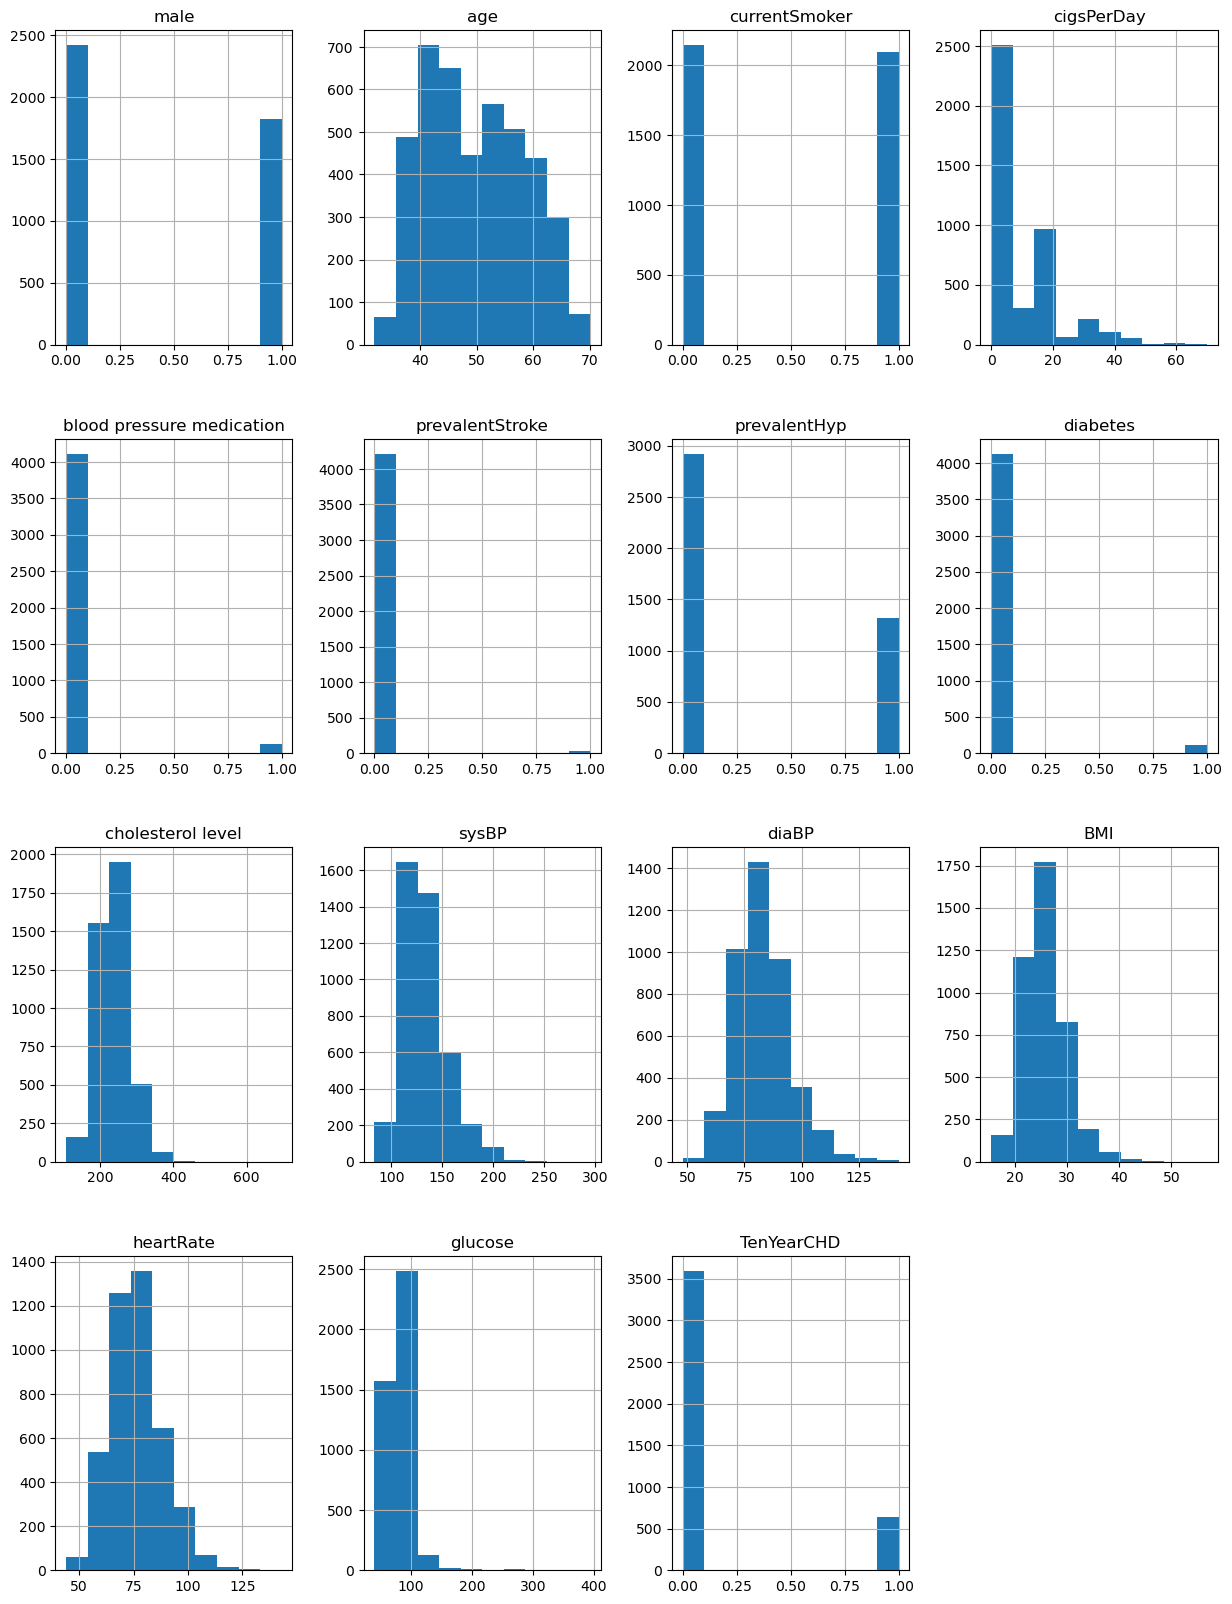

In [37]:
#distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)
plt.show()

## Data Spliting

In [38]:
X = heart_data.drop('TenYearCHD', axis='columns')
y = heart_data['TenYearCHD']

In [39]:
X

,male,age,currentSmoker,cigsPerDay,blood pressure medication,prevalentStroke,prevalentHyp,diabetes,cholesterol level,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [40]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
print(len(X_train))
print(len(X_test))

2966
1272


In [42]:
target_count = heart_data.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1') # Check for Class Imbalance

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


In [43]:
# from imblearn.over_sampling import RandomOverSampler

# # The dataset contains a significant class imbalance in the 'heart disease' column. with a proportion of 5.56 : 1.
# # To address this imbalance, we apply Random Oversampling to create a balanced training set.

# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

### Logistic Regression

In [44]:
model_lr=LogisticRegression()

In [45]:
model_lr.fit(X_train,y_train)

C:\Users\MSI MODERN\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# prediction 
logreg_pred = model_lr.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
lr_acc = accuracy_score(y_test, logreg_pred)
print(f"Accuracy for LogisticRegression: {round(lr_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
lr_f1 = f1_score(y_test, logreg_pred)
print(f"F1 score for LogisticRegression: {round(lr_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
lr_precision = precision_score(y_test, logreg_pred)
print(f"Orecision for LogisticRegression: {round(lr_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
lr_recall = recall_score(y_test, logreg_pred)
print(f"Recall for LogisticRegression: {round(lr_recall,3)*100}%")

cm = confusion_matrix(y_test, logreg_pred)
print("Condusion Matrix for LogisticRegression: \n", cm)

Accuracy for LogisticRegression: 87.0%
F1 score for LogisticRegression: 11.799999999999999%
Orecision for LogisticRegression: 52.400000000000006%
Recall for LogisticRegression: 6.6000000000000005%
Condusion Matrix for LogisticRegression: 
 [[1096   10]
 [ 155   11]]


### Support vector Machine

In [47]:
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy for SVM: {round(svm_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
svm_f1 = f1_score(y_test, svm_pred)
print(f"F1 score for SVM: {round(svm_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
svm_precision = precision_score(y_test, svm_pred)
print(f"Precision for SVM: {round(svm_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
svm_recall = recall_score(y_test, svm_pred)
print(f"Recall for SVM: {round(svm_recall,3)*100}%")

cm = confusion_matrix(y_test, svm_pred)
print("Condusion Matrix for SVM: \n", cm)

Accuracy for SVM: 86.9%
F1 score for SVM: 0.0%
Precision for SVM: 0.0%
Recall for SVM: 0.0%
Condusion Matrix for SVM: 
 [[1106    0]
 [ 166    0]]


C:\Users\MSI MODERN\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Trees

In [48]:
#initialize model
dt = DecisionTreeClassifier()

# fit model
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy for Decision Trees: {round(dt_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
dt_f1 = f1_score(y_test, dt_pred)
print(f"F1 score for Decision Trees: {round(dt_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
dt_precision = precision_score(y_test, dt_pred)
print(f"Precision for Decision Trees: {round(dt_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
dt_recall = recall_score(y_test, dt_pred)
print(f"Recall for Decision Trees: {round(dt_recall,3)*100}%")

cm = confusion_matrix(y_test, dt_pred)
print("Condusion Matrix for Decision Trees: \n", cm)

Accuracy for Decision Trees: 76.7%
F1 score for Decision Trees: 22.900000000000002%
Precision for Decision Trees: 20.200000000000003%
Recall for Decision Trees: 26.5%
Condusion Matrix for Decision Trees: 
 [[932 174]
 [122  44]]


### Random Forest Classification

In [49]:
rfc =  RandomForestClassifier()

#fit model
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
rfc_acc = accuracy_score(y_test, rfc_pred)
print(f"Accuracy for Random Forest: {round(rfc_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
rfc_f1 = f1_score(y_test, rfc_pred)
print(f"F1 score for Random Forest: {round(rfc_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
rfc_precision = precision_score(y_test, rfc_pred)
print(f"Precision for Random Forest: {round(rfc_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
rfc_recall = recall_score(y_test, rfc_pred)
print(f"Recall for Random Forest: {round(rfc_recall,3)*100}%")

cm = confusion_matrix(y_test, rfc_pred)
print("Condusion Matrix for Random Forest: \n", cm)

Accuracy for Random Forest: 86.7%
F1 score for Random Forest: 10.6%
Precision for Random Forest: 43.5%
Recall for Random Forest: 6.0%
Condusion Matrix for Random Forest: 
 [[1093   13]
 [ 156   10]]


### Comparing the Models

In [50]:
scores = {'Model':['Logistic Regression','SVM','Decision Tree','Random Forest'],
        'Accuracy':[lr_acc,svm_acc,dt_acc,rfc_acc],'F1':[lr_f1,svm_f1,dt_f1,rfc_f1],'Recall':[lr_recall,svm_recall,dt_recall,rfc_recall],'Precision':[lr_precision, svm_precision,dt_precision, rfc_precision]}

# Create DataFrame
df = pd.DataFrame(scores)
 
# Print the output.
print(df)

                 Model  Accuracy        F1    Recall  Precision
0  Logistic Regression  0.870283  0.117647  0.066265   0.523810
1                  SVM  0.869497  0.000000  0.000000   0.000000
2        Decision Tree  0.767296  0.229167  0.265060   0.201835
3        Random Forest  0.867138  0.105820  0.060241   0.434783


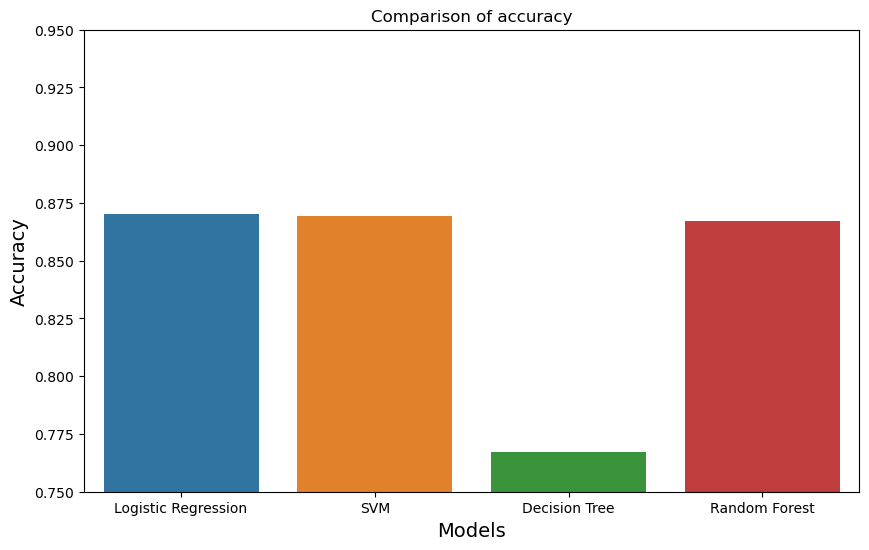

In [51]:


plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data = df)
plt.title('Comparison of accuracy')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.75, 0.95)
plt.show()


In [52]:
y_train

3491    0
3144    0
1010    0
1017    0
839     0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: TenYearCHD, Length: 2966, dtype: int64

In [53]:
filtered_data = y_test[y_test == 1]

# Count the number of occurrences where TenYearCHD is equal to 1
count = len(filtered_data)

# 'filtered_data' now contains rows where TenYearCHD is equal to 1
print("Filtered Data:")
print(filtered_data)

# Print the count
print("Number of occurrences where TenYearCHD is equal to 1:", count)

Filtered Data:
108     1
2633    1
17      1
899     1
1783    1
       ..
3227    1
3357    1
340     1
2111    1
1032    1
Name: TenYearCHD, Length: 166, dtype: int64
Number of occurrences where TenYearCHD is equal to 1: 166


In [54]:
correct_feature_order = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'blood pressure medication',
                         'prevalentStroke', 'prevalentHyp', 'diabetes', 'cholesterol level',
                         'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# New data point
new_data_point = [1, 222221, 1, 45554, 1, 1, 1, 1, 55.0, 86.0,87.0, 84.0, 85.0, 116]

# Create a pandas DataFrame for the new data point
new_data = pd.DataFrame([new_data_point], columns=correct_feature_order)

# Make predictions on the new data
predictions = rfc.predict(new_data)

In [55]:
predictions 

array([1], dtype=int64)

In [56]:
import pickle

In [57]:
pickle.dump(model_lr, open('logisticRegression.pkl','wb'))
pickle.dump(svm, open('SVM.pkl','wb'))
pickle.dump(rfc, open('forest.pkl','wb'))
pickle.dump(dt, open('tree.pkl','wb'))

In [58]:
import joblib

# # Save the model using joblib
# joblib.dump(rfc, 'rfc.pkl')

In [59]:
joblib.dump(dt, 'tree.pkl')

['tree.pkl']

In [60]:
dt = joblib.load('tree.pkl')

In [61]:
import os
os.getcwd()


'C:\\Users\\MSI MODERN'

In [62]:
try:
    with open('forest.pkl', 'rb') as file:
        rfc1 = pickle.load(file)
    # Check if the model is not None (i.e., loaded successfully)
    if rfc is not None:
        print("Model loaded successfully!")
        # You can now use 'rfc' to make predictions
    else:
        print("Failed to load the model.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully!


In [63]:
predictions = dt.predict(new_data)

# The 'predictions' variable now contains the predicted labels for your new data points
print(predictions)

[1]
